In [138]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np

import scipy.signal as signal

# Sawtooth Oscillator

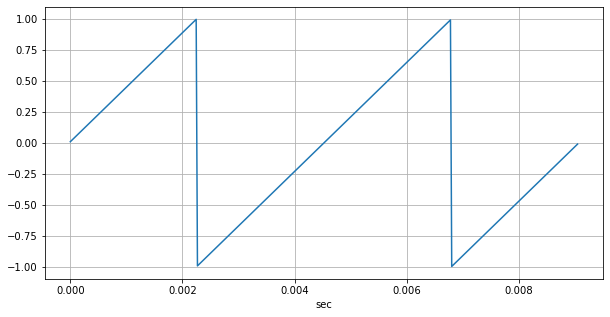

In [139]:
def sawtooth_osc(f0, dur, sr): 
# sr:  sampling rate
# dur: duration
# f0:  fundamental frequency

    phase_inc = 2/(sr/f0)
    phase = 0
    x = np.zeros(int(sr*dur))
    
    for n in range(len(x)):
        phase = phase + phase_inc
        if (phase > 1):
            phase = phase - 2
            
        x[n] = phase
        
    return x    


sr = 44100
f0 = 220
dur = 1
x_saw = sawtooth_osc(f0, dur, sr)
     
plt.figure(figsize=(10, 5))

n= np.arange(400)

plt.plot(n/sr, x_saw[:400])
plt.grid(True)
plt.xlabel('sec')

ipd.Audio(x_saw, rate=sr)


# Sqaure Oscillator

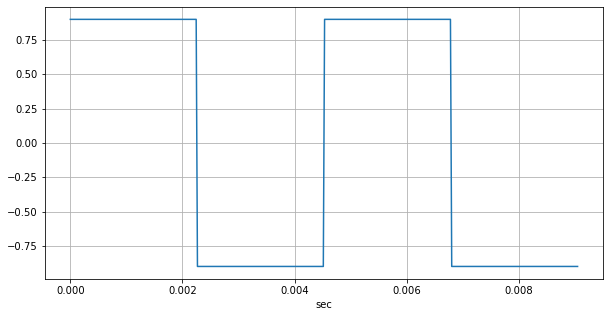

In [140]:
def square_osc(f0, dur, sr): 
# sr:  sampling rate
# dur: duration
# f0:  fundamental frequency

    phase_inc = 2/(sr/f0)
    phase = 0
    x = np.zeros(int(sr*dur))
    
    for n in range(len(x)):
        phase = phase + phase_inc
        if (phase > 1):
            phase = phase - 2
            
        if phase > 0: 
            x[n] = 0.9
        else: 
            x[n] = -0.9
        
    return x    


sr = 44100
f0 = 220
dur = 1
x_sqr = square_osc(f0, dur, sr)
     
plt.figure(figsize=(10, 5))

n= np.arange(400)

plt.plot(n/sr, x_sqr[:400])
plt.grid(True)
plt.xlabel('sec')

ipd.Audio(x_sqr, rate=sr)


# Resonant Lowpass Filter

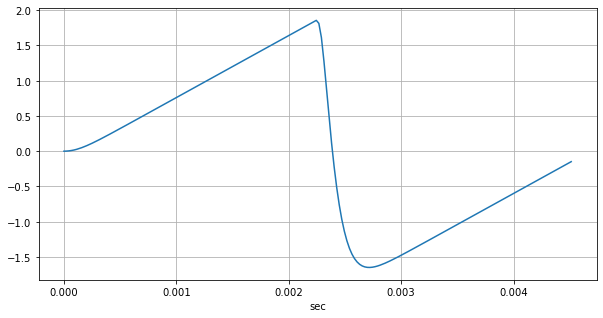

In [141]:
def res_lowpass(x, cutoff_freq, Q):
# x: input signal
# cutoff_freq: cut-off frquency, Hz
# Q: resonance, a small positive value (e.g. 0.001)to +inf

    # bi-quad lowpass filter
    theta = 2*np.pi*cutoff_freq/sr
    alpha = np.sin(theta)/2/Q
    b = [(1-np.cos(theta)), +2*(1-np.cos(theta)), (1-np.cos(theta))]
    a = [(1+alpha), -2*np.cos(theta), (1-alpha)]

    # apply the filter
    y = signal.lfilter(b,a,x)
    return y 



cutoff_freq = 2000
Q = 0.5 
x_saw_low = res_lowpass(x_saw, cutoff_freq, Q)

plt.figure(figsize=(10, 5))

n= np.arange(200)

plt.plot(n/sr, x_saw_low[:200])
plt.grid(True)
plt.xlabel('sec')

ipd.Audio(x_saw_low, rate=sr)



# Adding Amp Envelope (ADSR)

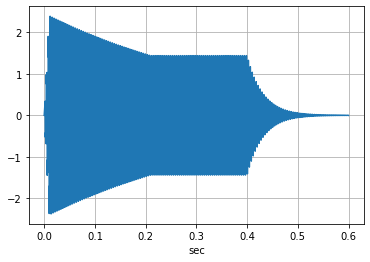

In [142]:
def amp_envelop(note_dur, attack_time, decay_time, sustain_level, release_time, sr):

    env_attack = np.linspace(0,1,int(attack_time*sr))
    env_decay = np.logspace(np.log10(1),np.log10(sustain_level),int(decay_time*sr))
    env_sustain = np.linspace(sustain_level,sustain_level,int((note_dur-attack_time-decay_time)*sr))
    env_release = np.logspace(np.log10(sustain_level),np.log10(0.001),int(release_time*sr))    
    
    amp_env = np.append(env_attack, env_decay)
    amp_env = np.append(amp_env, env_sustain)
    amp_env = np.append(amp_env, env_release)

    return amp_env



sr = 44100
f0 = 261

cutoff_freq = 2000 
Q = 1  

note_dur = 0.4 # time intervial betwen note-on and note-off 
attack_time = 0.01 # second
decay_time = 0.2 # second
sustain_level = 0.6 # the relative level of the peak level
release_time = 0.2 # second, after the note-off


# osc--> filter --> amp_envelop
x_note = square_osc(f0, note_dur+release_time, sr)
x_note = res_lowpass(x_note, cutoff_freq, Q)
amp_env = amp_envelop(note_dur, attack_time, decay_time, sustain_level, release_time, sr)
x_note = amp_env*x_note[:len(amp_env)]

    
n= np.arange(len(x_note))


plt.plot(n/sr, x_note)
plt.grid(True)
plt.xlabel('sec')

ipd.Audio(x_note, rate=sr)

